In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
df=pd.read_csv('C:\\Users\\gayat\\Desktop\\Nalaiya Thiran Lab\\Assignment 4\\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

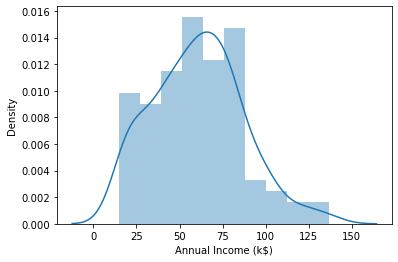

In [5]:
#Univariate Analysis
var="Annual Income (k$)"
sns.distplot(df[var])

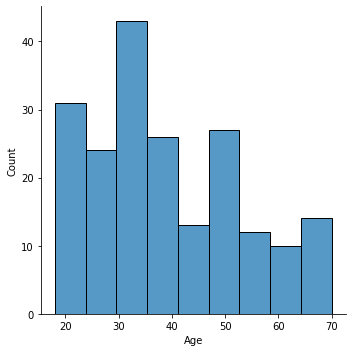

In [6]:
#Univariate Analysis
sns.displot(df.Age)

C:\Users\gayat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

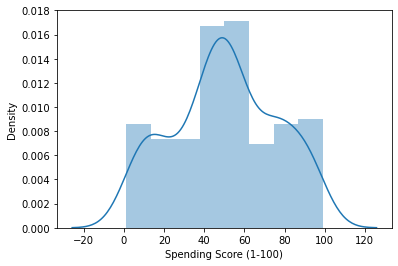

In [7]:
#Univariate Analysis
var="Spending Score (1-100)"
sns.distplot(df[var])

C:\Users\gayat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

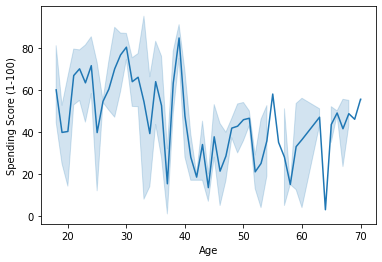

In [8]:
#Bivariate Analysis
sns.lineplot(df["Age"],df["Spending Score (1-100)"])

C:\Users\gayat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

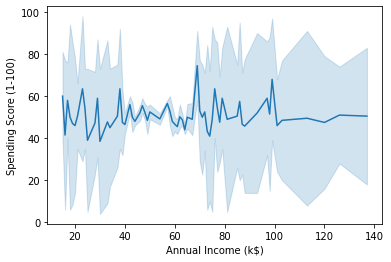

In [9]:
#Bivariate Analysis
sns.lineplot(df["Annual Income (k$)"],df["Spending Score (1-100)"])

In [11]:
df=df.drop(columns=['CustomerID'],axis=1)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual Income (k$)'}>],
       [<AxesSubplot:title={'center':'Spending Score (1-100)'}>,
        <AxesSubplot:>]], dtype=object)

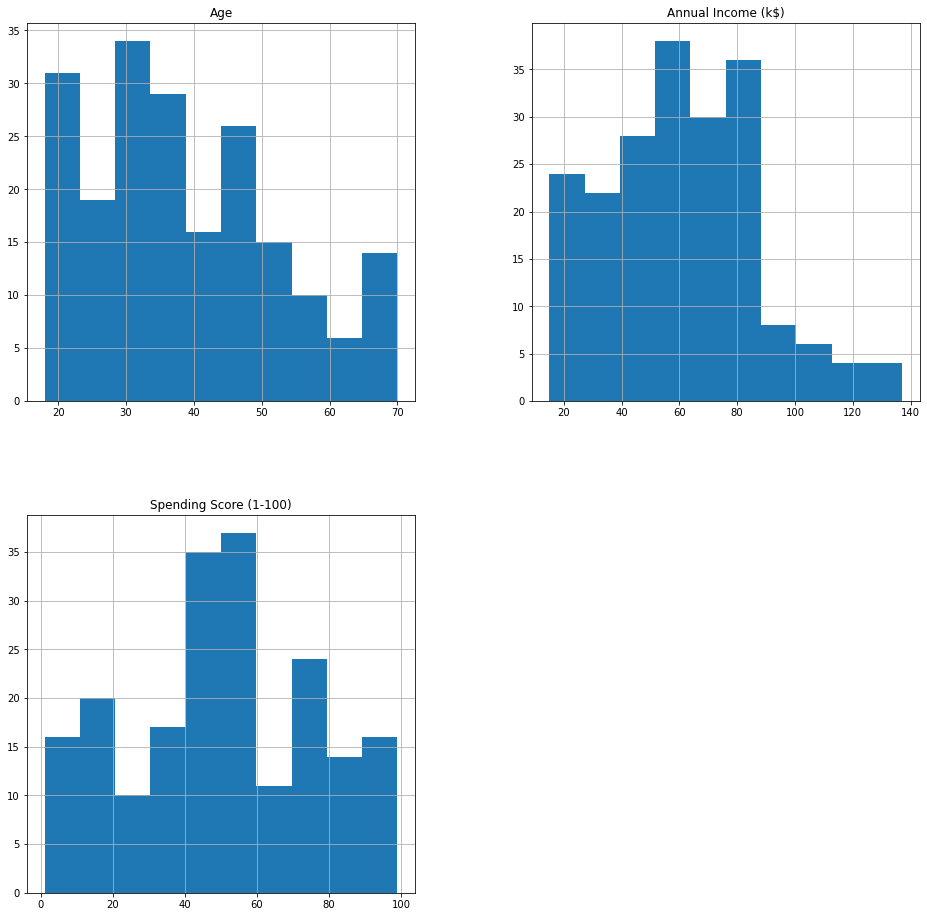

In [12]:
#Multivariate Analysis
df.hist(figsize=(16,16))

In [13]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [14]:
df.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

C:\Users\gayat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)'>

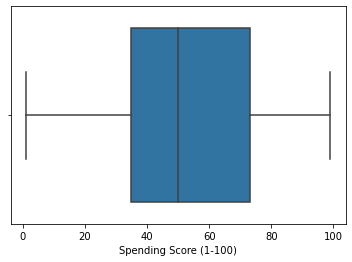

In [15]:
sns.boxplot(df["Spending Score (1-100)"])

C:\Users\gayat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

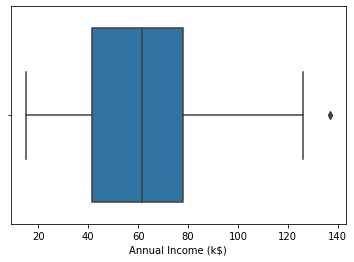

In [16]:
sns.boxplot(df["Annual Income (k$)"])

In [18]:
q1=df["Annual Income (k$)"].quantile(0.25)
q3=df["Annual Income (k$)"].quantile(0.75)
IQR=q3-q1
upper_limit= q3 + 1.5*IQR
df.median()

C:\Users\gayat\AppData\Local\Temp\ipykernel_11108\2508664500.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Age                       36.0
Annual Income (k$)        61.5
Spending Score (1-100)    50.0
dtype: float64

In [19]:
df["Annual Income (k$)"]=np.where(df["Annual Income (k$)"]>upper_limit,61.5,df["Annual Income (k$)"])

C:\Users\gayat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

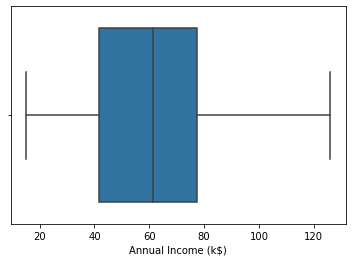

In [20]:
sns.boxplot(df["Annual Income (k$)"])

In [21]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [22]:
from sklearn.preprocessing import scale
df_scaled=pd.DataFrame(scale(df),columns=df.columns)
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.788777,-0.434801
1,1.128152,-1.281035,-1.788777,1.195704
2,-0.886405,-1.352802,-1.748853,-1.715913
3,-0.886405,-1.137502,-1.748853,1.040418
4,-0.886405,-0.563369,-1.708930,-0.395980


In [25]:
new_df=df

In [26]:
from sklearn import cluster
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(new_df)
    error.append(kmeans.inertia_)
error

C:\Users\gayat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[297063.675,
 201152.1081841432,
 139326.23321730684,
 100349.31619915171,
 71452.15398255126,
 54455.93879921247,
 48690.465943332725,
 43313.718991209935,
 39872.053120366225,
 35841.18387812699]

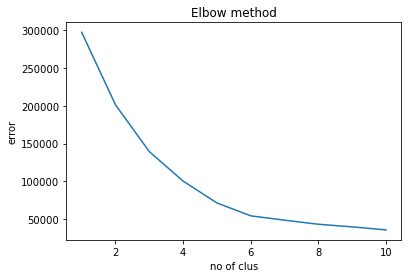

In [27]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [28]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)
km_model.fit(new_df)
ykmeans =km_model.predict(new_df)
ykmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [29]:
new_df['kclus'] = pd.Series(ykmeans)
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1,19,15.0,39,1
1,1,21,15.0,81,1
2,0,20,16.0,6,1
3,0,23,16.0,77,1
4,0,31,17.0,40,1


In [30]:
X= new_df.iloc[:,:-1]
Y= new_df.kclus

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 1)

In [32]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
l_reg=linear_model.LinearRegression()
model=l_reg.fit(x_train,y_train)
r_tree=RandomForestRegressor(max_features=4, n_estimators=30)
tree_model=r_tree.fit(x_train,y_train)

In [42]:
prediction=model.predict(x_test)
print("Prediction",prediction)
print("Actual value",y_test)

Prediction [0.97531056 0.82168176 0.3512103  1.29359631 0.8059923  0.36049075
 0.9827505  0.77717238 1.65109687 0.55328543 1.44463042 0.65081765
 1.93048895 0.97405788 1.15063446 0.92113416 1.41427389 1.52766619
 0.19941007 0.9844757  1.17210444 0.69753909 0.62148368 0.82357382
 1.37326191 0.05857745 0.52962486 0.64161313 1.79687195 1.1983186
 0.89771305 1.47795389 0.38921265 1.32502445 0.41131211 0.95727301
 0.3490399  1.20691389 0.91885744 0.22494368]
Actual value 58     1
40     1
34     1
102    1
184    0
198    0
95     1
4      1
29     1
168    0
171    2
18     1
11     1
89     1
110    1
118    1
159    2
35     1
136    0
59     1
51     1
16     1
44     1
94     1
31     1
162    0
38     1
28     1
193    2
27     1
47     1
165    2
194    0
177    2
176    0
97     1
174    0
73     1
69     1
172    0
Name: kclus, dtype: int32


In [43]:
prediction=tree_model.predict(x_test)
print("Prediction",prediction)
print("Actual value",y_test)

Prediction [1.         1.         1.         1.         0.46666667 0.63333333
 1.         1.         1.13333333 0.         2.         1.
 1.03333333 1.         1.         1.         2.         1.
 0.         1.         1.         1.         1.         1.
 1.         0.         1.         1.         2.         1.
 1.         2.         0.         1.93333333 0.         1.
 0.         1.         1.         0.        ]
Actual value 58     1
40     1
34     1
102    1
184    0
198    0
95     1
4      1
29     1
168    0
171    2
18     1
11     1
89     1
110    1
118    1
159    2
35     1
136    0
59     1
51     1
16     1
44     1
94     1
31     1
162    0
38     1
28     1
193    2
27     1
47     1
165    2
194    0
177    2
176    0
97     1
174    0
73     1
69     1
172    0
Name: kclus, dtype: int32


In [44]:
from sklearn.metrics import mean_squared_error
print("Train: ", np.sqrt(mean_squared_error(y_train, model.predict(x_train))))
print("Test: ", np.sqrt(mean_squared_error(y_test, model.predict(x_test))))

Train:  0.39694877865218653
Test:  0.39489961809131696


In [45]:
print("Train: ", np.sqrt(mean_squared_error(y_train, tree_model.predict(x_train))))
print("Test: ", np.sqrt(mean_squared_error(y_test, tree_model.predict(x_test))))

Train:  0.06476453075908482
Test:  0.1267105187249881


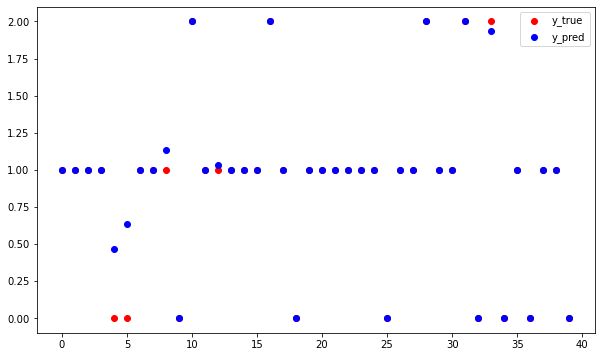

In [46]:
y_pred = tree_model.predict(x_test)

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color='red', label='y_true')
plt.scatter(range(y_test.shape[0]), y_pred, color='blue', label='y_pred')
plt.legend()
plt.show()